## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  10.207337  1718.744256  0.909034  6.470443  1.339852
1  72.147127   952.521015  0.866726  5.218481  1.599099
2  71.211965   371.724027  0.419379  8.643026  1.315682
3  74.140200  1678.091934  0.677029  9.950097  1.536740
4  17.602807  1369.518939  0.302196  4.881729  1.668492


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9679629	total: 55.6ms	remaining: 55.6s
1:	learn: 0.9609883	total: 56.4ms	remaining: 28.1s
2:	learn: 0.9548879	total: 57.1ms	remaining: 19s


3:	learn: 0.9470684	total: 58.7ms	remaining: 14.6s
4:	learn: 0.9382035	total: 60.1ms	remaining: 12s
5:	learn: 0.9316131	total: 60.6ms	remaining: 10s
6:	learn: 0.9255075	total: 62.4ms	remaining: 8.86s
7:	learn: 0.9180041	total: 63.3ms	remaining: 7.84s
8:	learn: 0.9090225	total: 63.8ms	remaining: 7.02s
9:	learn: 0.9008679	total: 64.3ms	remaining: 6.37s
10:	learn: 0.8942426	total: 65.2ms	remaining: 5.86s
11:	learn: 0.8852329	total: 66ms	remaining: 5.43s
12:	learn: 0.8775815	total: 66.7ms	remaining: 5.07s
13:	learn: 0.8700421	total: 67.4ms	remaining: 4.75s
14:	learn: 0.8634241	total: 68.1ms	remaining: 4.47s
15:	learn: 0.8572117	total: 69ms	remaining: 4.24s
16:	learn: 0.8503470	total: 69.7ms	remaining: 4.03s
17:	learn: 0.8437651	total: 70.4ms	remaining: 3.84s
18:	learn: 0.8389234	total: 71.2ms	remaining: 3.67s
19:	learn: 0.8317019	total: 71.9ms	remaining: 3.52s
20:	learn: 0.8242303	total: 72.6ms	remaining: 3.38s
21:	learn: 0.8183040	total: 73.3ms	remaining: 3.26s
22:	learn: 0.8131605	total:

122:	learn: 0.4276009	total: 157ms	remaining: 1.12s
123:	learn: 0.4254982	total: 158ms	remaining: 1.12s
124:	learn: 0.4225502	total: 159ms	remaining: 1.11s
125:	learn: 0.4200942	total: 161ms	remaining: 1.12s
126:	learn: 0.4177912	total: 162ms	remaining: 1.11s
127:	learn: 0.4157624	total: 163ms	remaining: 1.11s
128:	learn: 0.4133241	total: 164ms	remaining: 1.1s
129:	learn: 0.4113245	total: 164ms	remaining: 1.1s
130:	learn: 0.4091533	total: 165ms	remaining: 1.09s
131:	learn: 0.4070529	total: 166ms	remaining: 1.09s
132:	learn: 0.4051845	total: 167ms	remaining: 1.09s
133:	learn: 0.4025325	total: 168ms	remaining: 1.08s
134:	learn: 0.4005062	total: 169ms	remaining: 1.08s
135:	learn: 0.3977347	total: 170ms	remaining: 1.08s
136:	learn: 0.3960067	total: 171ms	remaining: 1.08s
137:	learn: 0.3937006	total: 172ms	remaining: 1.07s
138:	learn: 0.3923146	total: 172ms	remaining: 1.07s
139:	learn: 0.3898075	total: 173ms	remaining: 1.06s
140:	learn: 0.3880326	total: 174ms	remaining: 1.06s
141:	learn: 0.

181:	learn: 0.3194099	total: 205ms	remaining: 923ms
182:	learn: 0.3180523	total: 206ms	remaining: 920ms
183:	learn: 0.3168841	total: 206ms	remaining: 915ms
184:	learn: 0.3154259	total: 207ms	remaining: 912ms
185:	learn: 0.3143508	total: 208ms	remaining: 910ms
186:	learn: 0.3128962	total: 208ms	remaining: 906ms
187:	learn: 0.3111380	total: 209ms	remaining: 903ms
188:	learn: 0.3096515	total: 210ms	remaining: 901ms
189:	learn: 0.3077207	total: 211ms	remaining: 897ms
190:	learn: 0.3065532	total: 211ms	remaining: 895ms
191:	learn: 0.3045990	total: 212ms	remaining: 892ms
192:	learn: 0.3038987	total: 212ms	remaining: 888ms
193:	learn: 0.3023325	total: 213ms	remaining: 885ms
194:	learn: 0.3010287	total: 213ms	remaining: 881ms
195:	learn: 0.3001957	total: 214ms	remaining: 879ms
196:	learn: 0.2992214	total: 215ms	remaining: 875ms
197:	learn: 0.2981320	total: 215ms	remaining: 872ms
198:	learn: 0.2969207	total: 216ms	remaining: 869ms
199:	learn: 0.2954125	total: 217ms	remaining: 867ms
200:	learn: 

333:	learn: 0.1765292	total: 311ms	remaining: 620ms
334:	learn: 0.1758828	total: 312ms	remaining: 619ms
335:	learn: 0.1749702	total: 313ms	remaining: 619ms
336:	learn: 0.1743099	total: 314ms	remaining: 618ms
337:	learn: 0.1737391	total: 315ms	remaining: 616ms
338:	learn: 0.1728867	total: 315ms	remaining: 615ms
339:	learn: 0.1721403	total: 316ms	remaining: 614ms
340:	learn: 0.1715576	total: 317ms	remaining: 612ms
341:	learn: 0.1709836	total: 317ms	remaining: 610ms
342:	learn: 0.1705055	total: 318ms	remaining: 609ms
343:	learn: 0.1698845	total: 319ms	remaining: 608ms
344:	learn: 0.1690805	total: 319ms	remaining: 606ms
345:	learn: 0.1685332	total: 320ms	remaining: 605ms
346:	learn: 0.1678357	total: 321ms	remaining: 603ms
347:	learn: 0.1670366	total: 321ms	remaining: 602ms
348:	learn: 0.1663612	total: 322ms	remaining: 600ms
349:	learn: 0.1660372	total: 322ms	remaining: 599ms
350:	learn: 0.1654283	total: 323ms	remaining: 597ms
351:	learn: 0.1650990	total: 324ms	remaining: 596ms
352:	learn: 

408:	learn: 0.1432970	total: 362ms	remaining: 525ms
409:	learn: 0.1429424	total: 363ms	remaining: 523ms
410:	learn: 0.1428404	total: 363ms	remaining: 522ms
411:	learn: 0.1425392	total: 364ms	remaining: 521ms
412:	learn: 0.1424614	total: 365ms	remaining: 520ms
413:	learn: 0.1421291	total: 365ms	remaining: 519ms
414:	learn: 0.1420314	total: 366ms	remaining: 517ms
415:	learn: 0.1419564	total: 367ms	remaining: 516ms
416:	learn: 0.1416597	total: 368ms	remaining: 515ms
417:	learn: 0.1415652	total: 368ms	remaining: 514ms
418:	learn: 0.1409936	total: 369ms	remaining: 512ms
419:	learn: 0.1409015	total: 369ms	remaining: 511ms
420:	learn: 0.1408306	total: 370ms	remaining: 510ms
421:	learn: 0.1401577	total: 371ms	remaining: 509ms
422:	learn: 0.1399791	total: 372ms	remaining: 508ms
423:	learn: 0.1397649	total: 372ms	remaining: 507ms
424:	learn: 0.1393423	total: 373ms	remaining: 506ms
425:	learn: 0.1390616	total: 374ms	remaining: 506ms
426:	learn: 0.1385107	total: 375ms	remaining: 504ms
427:	learn: 

585:	learn: 0.0784559	total: 511ms	remaining: 362ms
586:	learn: 0.0782543	total: 513ms	remaining: 361ms
587:	learn: 0.0781685	total: 514ms	remaining: 360ms
588:	learn: 0.0779734	total: 514ms	remaining: 359ms
589:	learn: 0.0776511	total: 515ms	remaining: 358ms
590:	learn: 0.0775127	total: 515ms	remaining: 357ms
591:	learn: 0.0773243	total: 516ms	remaining: 356ms
592:	learn: 0.0772347	total: 516ms	remaining: 355ms
593:	learn: 0.0770520	total: 517ms	remaining: 354ms
594:	learn: 0.0766764	total: 518ms	remaining: 353ms
595:	learn: 0.0765619	total: 518ms	remaining: 352ms
596:	learn: 0.0763249	total: 519ms	remaining: 351ms
597:	learn: 0.0762117	total: 519ms	remaining: 350ms
598:	learn: 0.0760390	total: 520ms	remaining: 349ms
599:	learn: 0.0758571	total: 521ms	remaining: 348ms
600:	learn: 0.0755722	total: 521ms	remaining: 347ms
601:	learn: 0.0753197	total: 522ms	remaining: 346ms
602:	learn: 0.0750944	total: 522ms	remaining: 345ms
603:	learn: 0.0750152	total: 523ms	remaining: 344ms
604:	learn: 

784:	learn: 0.0434727	total: 666ms	remaining: 183ms
785:	learn: 0.0433677	total: 666ms	remaining: 182ms
786:	learn: 0.0432538	total: 668ms	remaining: 181ms
787:	learn: 0.0431279	total: 669ms	remaining: 180ms
788:	learn: 0.0430529	total: 669ms	remaining: 179ms
789:	learn: 0.0429793	total: 670ms	remaining: 178ms
790:	learn: 0.0428227	total: 670ms	remaining: 177ms
791:	learn: 0.0427505	total: 671ms	remaining: 176ms
792:	learn: 0.0426473	total: 671ms	remaining: 175ms
793:	learn: 0.0424944	total: 672ms	remaining: 175ms
794:	learn: 0.0424220	total: 672ms	remaining: 174ms
795:	learn: 0.0422217	total: 673ms	remaining: 173ms
796:	learn: 0.0421212	total: 674ms	remaining: 172ms
797:	learn: 0.0420217	total: 674ms	remaining: 171ms
798:	learn: 0.0419522	total: 675ms	remaining: 170ms
799:	learn: 0.0418140	total: 676ms	remaining: 169ms
800:	learn: 0.0417159	total: 676ms	remaining: 168ms
801:	learn: 0.0415948	total: 677ms	remaining: 167ms
802:	learn: 0.0415251	total: 677ms	remaining: 166ms
803:	learn: 

974:	learn: 0.0278008	total: 818ms	remaining: 21ms
975:	learn: 0.0277810	total: 819ms	remaining: 20.2ms
976:	learn: 0.0276757	total: 820ms	remaining: 19.3ms
977:	learn: 0.0275265	total: 820ms	remaining: 18.5ms
978:	learn: 0.0274256	total: 821ms	remaining: 17.6ms
979:	learn: 0.0273763	total: 822ms	remaining: 16.8ms
980:	learn: 0.0273570	total: 822ms	remaining: 15.9ms
981:	learn: 0.0273216	total: 823ms	remaining: 15.1ms
982:	learn: 0.0272733	total: 823ms	remaining: 14.3ms
983:	learn: 0.0272455	total: 824ms	remaining: 13.4ms
984:	learn: 0.0271774	total: 825ms	remaining: 12.6ms
985:	learn: 0.0271427	total: 825ms	remaining: 11.7ms
986:	learn: 0.0270643	total: 827ms	remaining: 10.9ms
987:	learn: 0.0270266	total: 828ms	remaining: 10.1ms
988:	learn: 0.0269918	total: 829ms	remaining: 9.23ms
989:	learn: 0.0269257	total: 831ms	remaining: 8.4ms
990:	learn: 0.0267921	total: 832ms	remaining: 7.57ms
991:	learn: 0.0267340	total: 833ms	remaining: 6.72ms
992:	learn: 0.0267004	total: 833ms	remaining: 5.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.43013144695516886


ABC Pre-generator MAE 0.4333040465671266


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

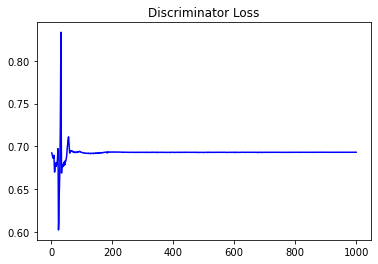

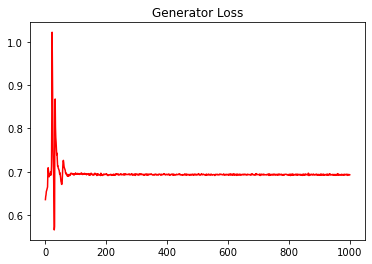

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.4432954291217029


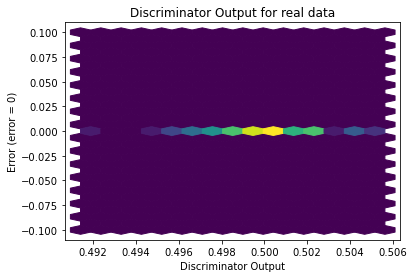

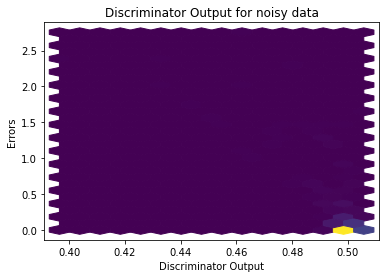

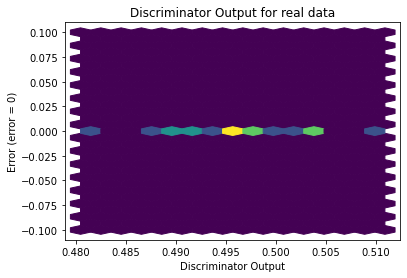

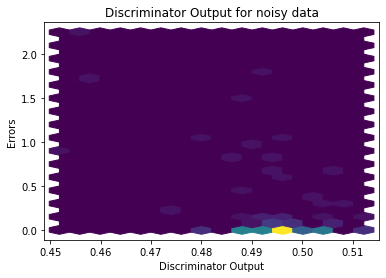

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

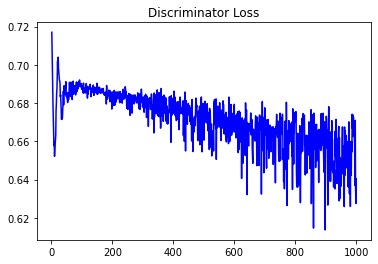

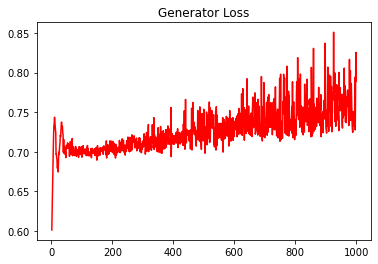

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.48589748435840013


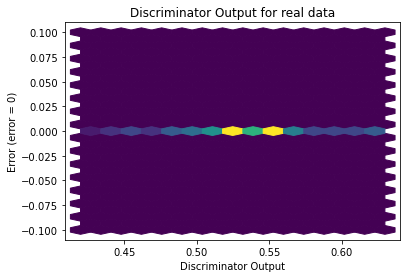

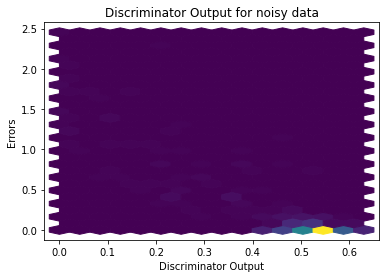

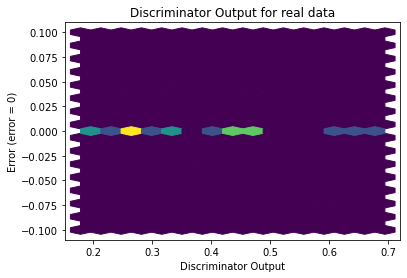

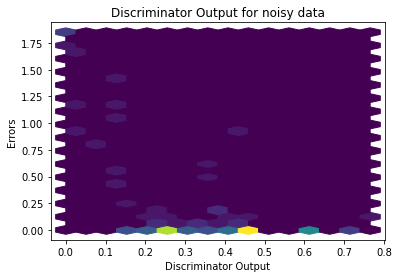

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


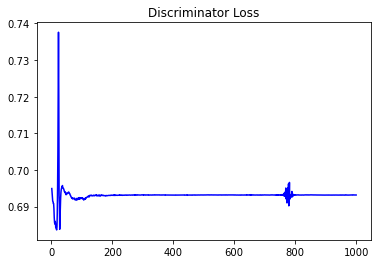

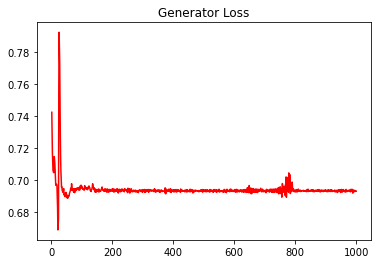

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.453654971756041


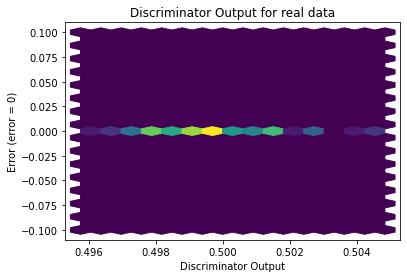

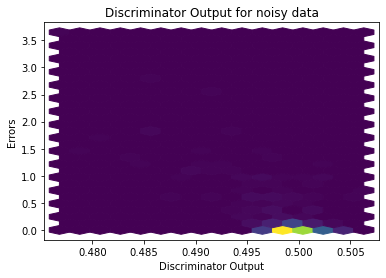

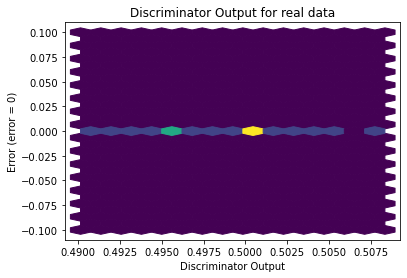

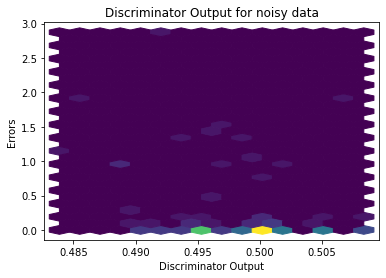

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


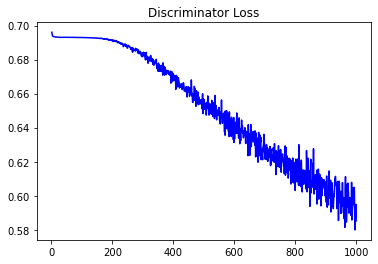

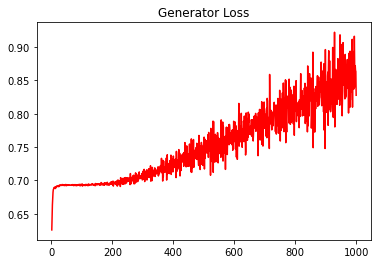

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.4301998981721699


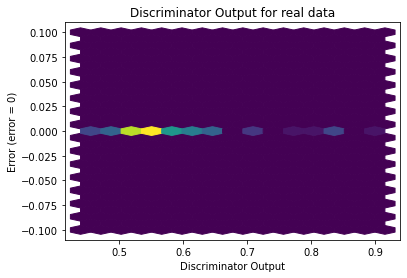

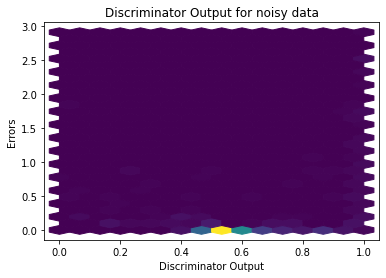

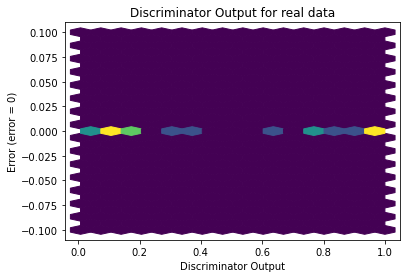

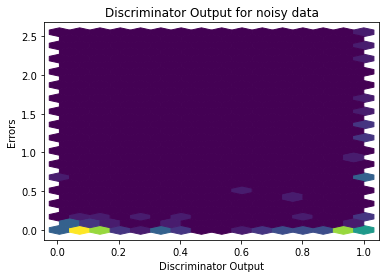

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4759]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
